In [ ]:
pip install control

FT= 
          1
---------------------
s^3 + 2 s^2 + 3 s + 1

K de oscilação  5.0
T de oscilação  3.627705142713387


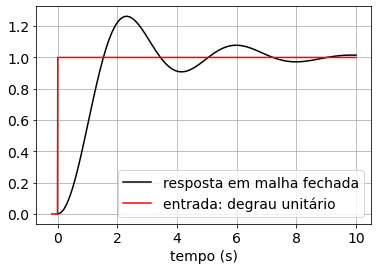

In [ ]:
#terra das exatas
#https://www.youtube.com/c/TerradasExatas
#importa as bibliotecas
import control as ctl
import matplotlib.pyplot as plt
import numpy as np

# FT da planta
s = ctl.TransferFunction.s
P_s=1/(s**3+2*s**2+3*s+1)
print("FT=",P_s)

#calcula o ganho crítico e a freq de oscilação
out_st_magn=ctl.stability_margins(P_s)
K_cr=np.round(out_st_magn[0]*1000)/1000
W_cr=np.round(out_st_magn[3]*1000)/1000
T_cr=2*np.pi/W_cr
print('K de oscilação ',K_cr)
print('T de oscilação ',T_cr)

# controlador PID Ziegler-Nichols da frequencia
Ki=1.2*K_cr/T_cr;Kp=K_cr*0.6;Kd=0.075*K_cr*T_cr;
print('Kp=' f'{Kp:6.2f}, Ki=' f'{Ki:6.2f}, Kd=' f'{Kd:6.2f}') 
C_s=(Ki+Kp*s+Kd*s**2)/(s)
# calcula FT em malha fechada
H_s=1
G_s=ctl.series(C_s, P_s);
G1_s=ctl.feedback(G_s, H_s, sign=-1);
#calcula a resposta ao degrau do PID sintonizado
Tsim=10
T, yout = ctl.step_response(G1_s, Tsim)
#faz 
plt.rcParams.update({'font.size': 14})
plt.figure()
plt.plot(T,yout,'k-',label="resposta em malha fechada");plt.grid()
T2=np.linspace(-0.2,Tsim,1000)
degrau=np.ones_like(T2)
degrau[T2<0]=0;
plt.plot(T2,degrau,'r-',label="entrada: degrau unitário")
plt.xlabel('tempo (s)')
plt.legend()

In [ ]:
#terra das exatas
#https://www.youtube.com/c/TerradasExatas
#importa a biblioteca simbólica
import sympy
#define as variáveis
s,vc1,vout,il,iR1,iR2,vin,R1,R2,C1,C2,L = sympy.symbols(
    's,vc1,vout,il,iR1,iR2,vin,R1,R2,C1,C2,L')
#valor dos componentes
R1=1; R2=1; C1=1; C2=1; L=1 #comente essa linha para solução geral!
#equações
eq1 =  vc1 + R1*iR1 - vin
eq2 =  vout-vc1 + L*s*il + R2*iR2
eq3 = -C1*s*vc1 + iR1 - iR2
eq4 =  iR2 - il
eq5 =  C2*s*vout - il
#resolve o sistema
solucao=sympy.solve([eq1, eq2,eq3,eq4,eq5],(vout,vc1,il,iR1,iR2))
#mostra a solução
print('\n Vout=')
sympy.pprint(solucao[vout])


 Vout=
        vin        
───────────────────
 3      2          
s  + 2⋅s  + 3⋅s + 1


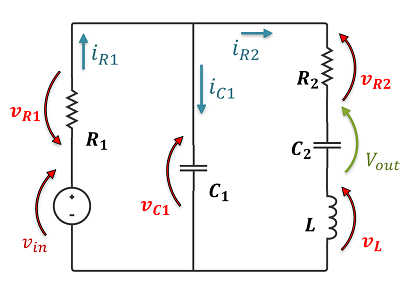